In [1]:
import importlib
imported_module = importlib.import_module("sql_commands")
importlib.reload(imported_module)
import sql_commands
from sql_commands import *
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# db_names = ['tpch_2pct', 'tpch_4pct', 'tpch_6pct', 'tpch_8pct', 'tpch_10pct']
# null_rates = [0.02, 0.04, 0.06, 0.08, 0.1]
db_names = ['tpch_1pct', 'tpch_2pct', 'tpch_3pct', 'tpch_4pct', 'tpch_5pct']
null_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
mydb, mycursor = sql_commands.connect_to_db("tpch_2pct")
if not os.path.exists("performance_results"):
    # If it doesn't exist, create it
    os.makedirs("performance_results")

# Plot Function

In [9]:
def plot_results(results, query_num, log=False):
    # Create an array of indices for the x-axis
    plt.grid(True, zorder=0)
    indices = [int(x*100) for x in null_rates]

    # Horizontal line
    # plt.axhline(y=1, color='gray', linestyle='--', zorder=3)

    # Create the bar plot
    plt.bar(indices, results, color='red', zorder=3, width=0.3)

    # Add labels to the x-axis
    plt.xticks(indices, [str(i) for i in indices])

    # scale
    if log:
        plt.yscale('log')

    # Add labels to the y-axis and title to the plot
    plt.ylabel('Average relative Performance')
    plt.xlabel('Null Rate (%)')
    plt.title(f'Query {query_num}+')
    if np.max(results) < 50:
        plt.ylim((np.min(results)-0.05, np.max(results)+0.05))
    else:
        plt.ylim((np.min(results)-10, np.max(results)+100))

    # save plot as file
    plt.savefig(f"performance_results/q{query_num}_plus.png")
    
    # Show the plot
    plt.show()


# Query 1

In [5]:
q1_nations = ['UNITED KINGDOM', 'ARGENTINA', 'PERU', 'FRANCE', 'BRAZIL']
q1_results = []
for db_name in db_names:
    mydb, mycursor = sql_commands.connect_to_db(db_name)
    ratios = []
    for i in range(10):
        result, q1_time, nation = run_query1(mycursor, q1_nations[i%len(q1_nations)], simple=False)
        result, q1_mod_time = run_query1_modified(mycursor, nation)
        ratio = q1_mod_time / q1_time
        ratios.append(ratio)
    avg = np.mean(ratios)
    print(f"AVG for {db_name} is {avg:.4} seconds")
    q1_results.append(avg)

AVG for tpch_1pct is 1.107 seconds
AVG for tpch_2pct is 1.075 seconds
AVG for tpch_3pct is 1.012 seconds
AVG for tpch_4pct is 0.8552 seconds
AVG for tpch_5pct is 0.9704 seconds


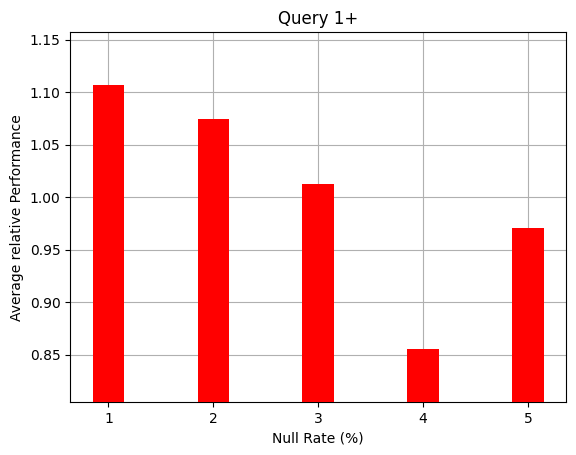

In [6]:
plot_results(q1_results, "1")

# Query 2

In [12]:
all_nations_raw = sql_commands.run_query(mycursor, "SELECT N_NAME FROM NATION")
all_nations = []
for nation in all_nations_raw:
    n = nation[0]
    if n is not None:
        all_nations.append(n)

In [14]:
q2_results = []
for db_name in db_names:
    mydb, mycursor = sql_commands.connect_to_db(db_name)
    ratios = []
    for i in range(20):
        nations = tuple(random.sample(all_nations, 7))
        result, q2_time, countries = run_query2(mycursor, nations, simple=False)
        result, q2_mod_time = run_query2_modified(mycursor, countries)
        ratio = q2_mod_time / q2_time
        ratios.append(ratio)
    avg = np.mean(ratios)
    print(f"AVG for {db_name} is {avg:.4} seconds")
    q2_results.append(avg)

AVG for tpch_1pct is 0.1889 seconds
AVG for tpch_2pct is 0.1868 seconds
AVG for tpch_3pct is 0.1741 seconds
AVG for tpch_4pct is 0.2485 seconds
AVG for tpch_5pct is 0.2299 seconds


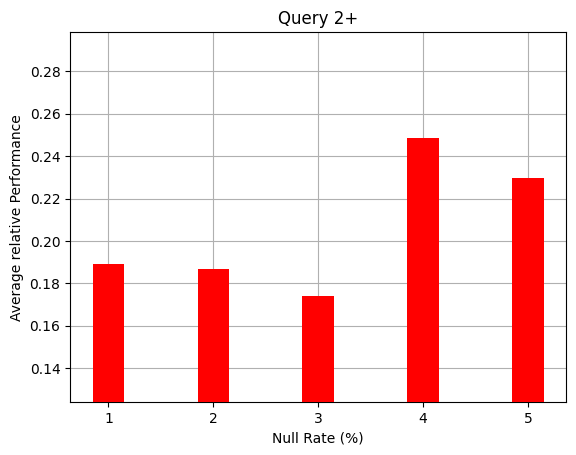

In [84]:
plot_results(q2_results, "2")

# Query 3

In [7]:
q3_results = []
for db_name in db_names:
    mydb, mycursor = sql_commands.connect_to_db(db_name)
    ratios = []
    for i in range(20):
        result, q3_time, supp_key = run_query3(mycursor, simple=False)
        result, q3_mod_time = run_query3_modified(mycursor, supp_key)
        ratio = q3_mod_time / q3_time
        ratios.append(ratio)
    avg = np.mean(ratios)
    print(f"AVG for {db_name} is {avg:.4} seconds")
    q3_results.append(avg)

AVG for tpch_1pct is 0.9531 seconds
AVG for tpch_2pct is 1.028 seconds
AVG for tpch_3pct is 0.9782 seconds
AVG for tpch_4pct is 0.9828 seconds
AVG for tpch_5pct is 0.9965 seconds


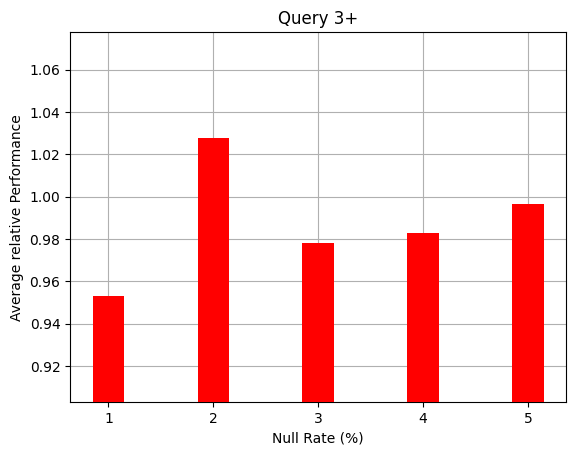

In [8]:
plot_results(q3_results, "3")

# Query 4

In [13]:
q4_results = []
for db_name in db_names:
    mydb, mycursor = sql_commands.connect_to_db(db_name)
    ratios = []
    for i in range(5):
        result, q4_time, nation, color = run_query4(mycursor, all_nations, simple=False)
        result, q4_mod_time = run_query4_modified(mycursor, nation, color)
        ratio = q4_mod_time / q4_time
        # print("times", q4_mod_time, q4_time)
        ratios.append(ratio)
    avg = np.mean(ratios)
    print(f"AVG for {db_name} is {avg:.4}")
    q4_results.append(avg)

AVG for tpch_1pct is 12.91
AVG for tpch_2pct is 81.26
AVG for tpch_3pct is 137.2
AVG for tpch_4pct is 232.8
AVG for tpch_5pct is 830.7


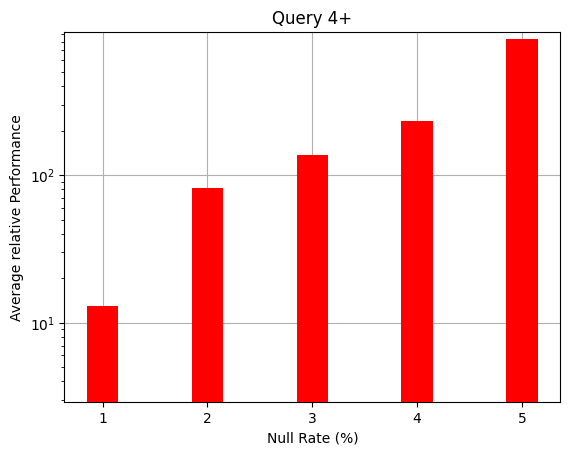

In [14]:
plot_results(q4_results, "4", log=True)